# Anomaly Detection in R

# Mary Donovan Martello

## The goal of this project was to use R to design unsupervised predictive binary classification models to predict whether credit card transactions are fraudulent transactions.  The unsupervised learning methods I analyzed were One Class Support Vector Machine, K means clustering and DBSCAN clustering.  I compared the results of the unsupervised learning models with supervised classification models.  In each model, I tested a dataset with all the input features except the three non-normal features dropped.  I also tested each model with only the 5 features we identified as the most significant features.  This notebook is the One Class Support Vector Machine model and comparative supervised models.

## Part 5:  One Class SVM vs Supervised SVM

In [2]:
# Importing required libraries
library(dplyr)
library(caret)
library(ggplot2)
library(caTools)
library(ROSE)
library(smotefamily)
library(rpart)
library(rpart.plot)
library(psych)
library(ltm)
library(corrplot)
library(e1071)
library(data.table)
library(factoextra)
library(NbClust)
library(rminer)
library(MLmetrics)
library(fpc)
library(dbscan)
library(e1071)
library(caret)
library(NLP)
library(tm)

suppressMessages(library(dplyr))
suppressMessages(library(caTools))
suppressMessages(library(ROSE))
suppressMessages(library(smotefamily))
suppressMessages(library(rpart.plot))
suppressMessages(library(psych))
suppressMessages(library(ltm))
suppressMessages(library(corrplot))
suppressMessages(library(e1071))
suppressMessages(library(data.table))
suppressMessages(library(factoextra))
suppressMessages(library(NbClust))
suppressMessages(library(rminer))
suppressMessages(library(MLmetrics))
suppressMessages(library(fpc))
suppressMessages(library(dbscan))
suppressMessages(library(e1071))
suppressMessages(library(caret))
suppressMessages(library(NLP))
suppressMessages(library(tm))

### This notebook uses the dataset that was randomly sampled in the 3_PreprocessDataProportional notebook due to the large size of the original dataset.

In [3]:
#Loading the dataset
dfAll <- read.csv('creditFraud20.csv')

In [4]:
# turn off scientific notation
options(scipen = 999)

In [5]:
head(dfAll, 2)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33209,0.1579738,-0.3135721,-0.8799915,-2.3710149,1.832820,3.3410355,-0.8045669,0.01251665,-0.9891706,...,0.674059981,-0.8824945,-0.26334793,0.9186489,1.0777848,-0.3662552,0.13243425,0.22821326,80.08,0
77276,1.2470640,-0.3239156,0.9178714,-0.7282708,-1.180023,-0.8173157,-0.5494987,-0.05259299,1.7699065,...,-0.008405836,0.2422148,-0.03969362,0.4188275,0.5116329,-0.6877417,0.09587039,0.03602943,1.00,0


### Create Subset of Features from Feature Selection

In [6]:
dfSub <- dfAll[, c(5:5, 11:11, 13:13, 15:15, 18:18, 31:31)]
head(dfSub, 2)

V4,V10,V12,V14,V17,Class
-2.3710149,-0.3395744,-0.8130265,-1.1791100,0.5734176,0
-0.7282708,-1.0898177,0.9220560,-0.2163698,-0.1641099,0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


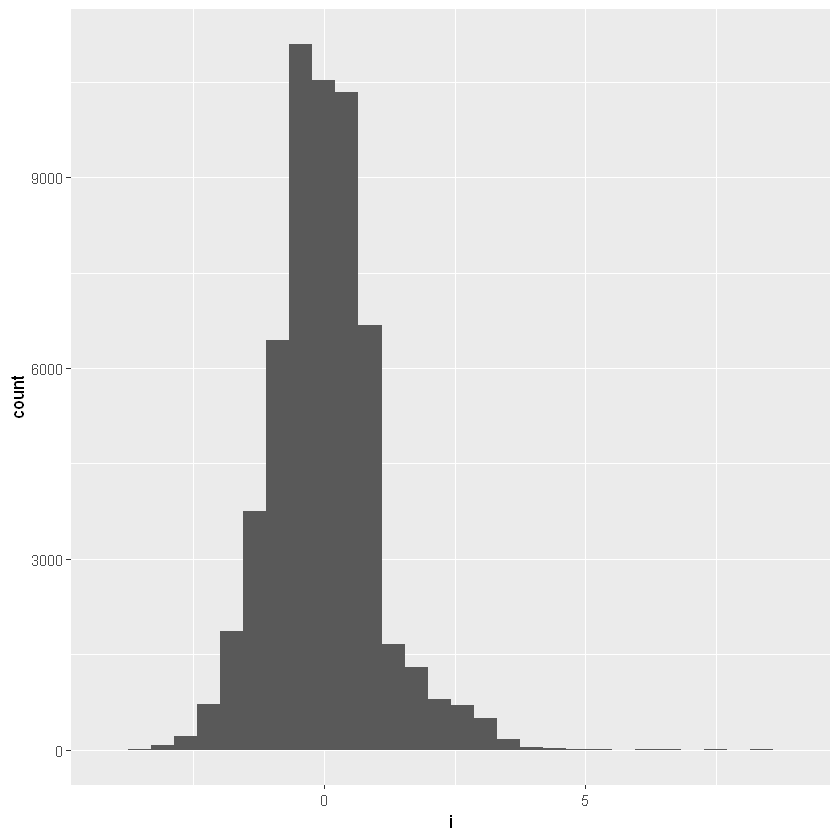

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


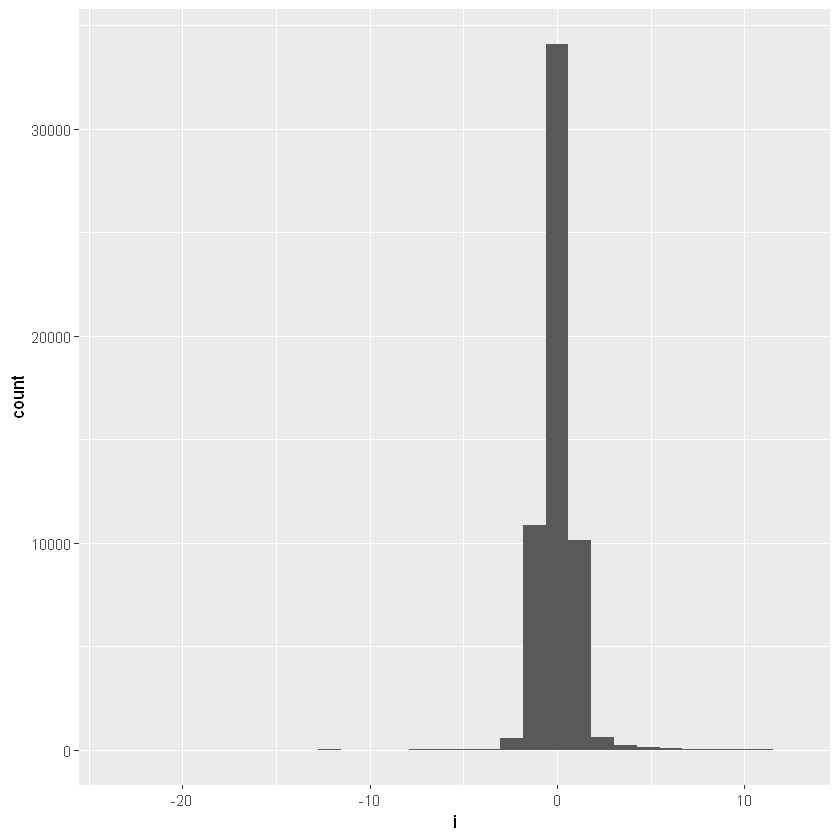

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


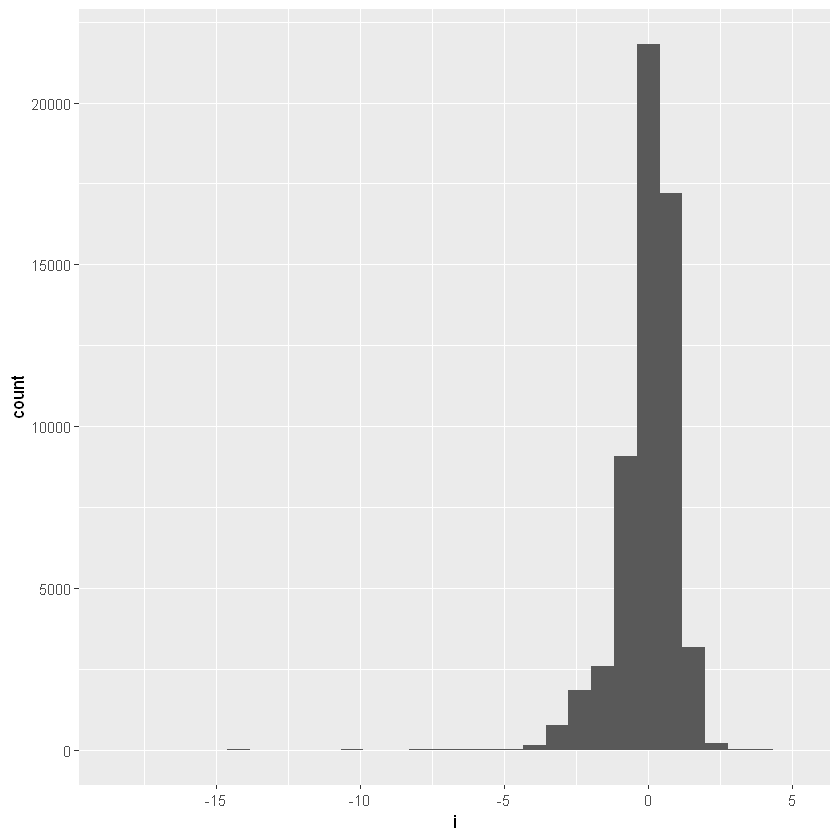

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


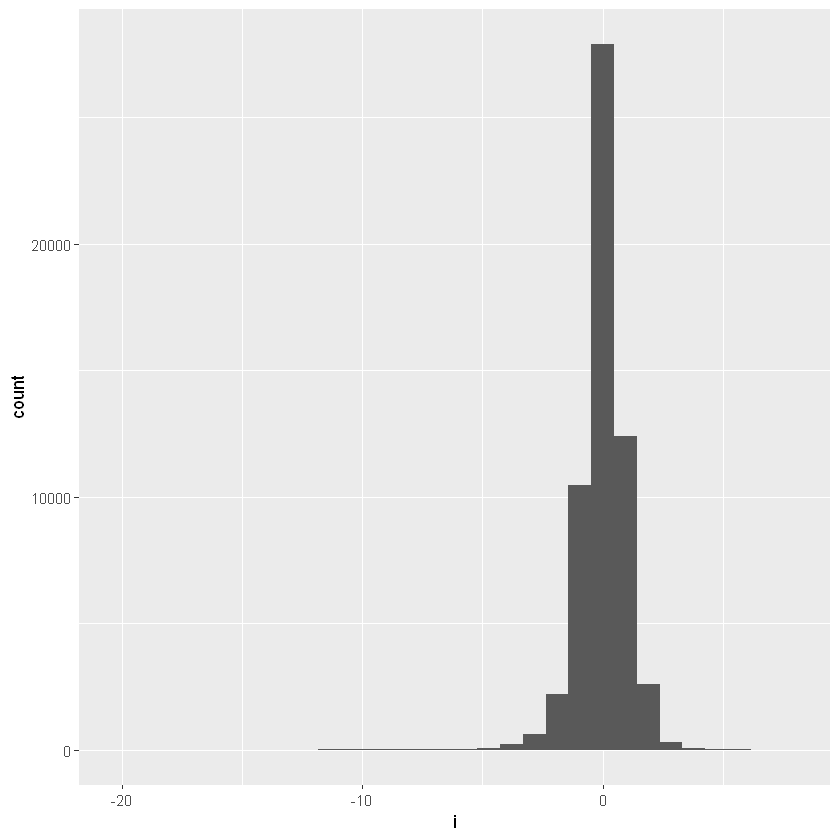

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


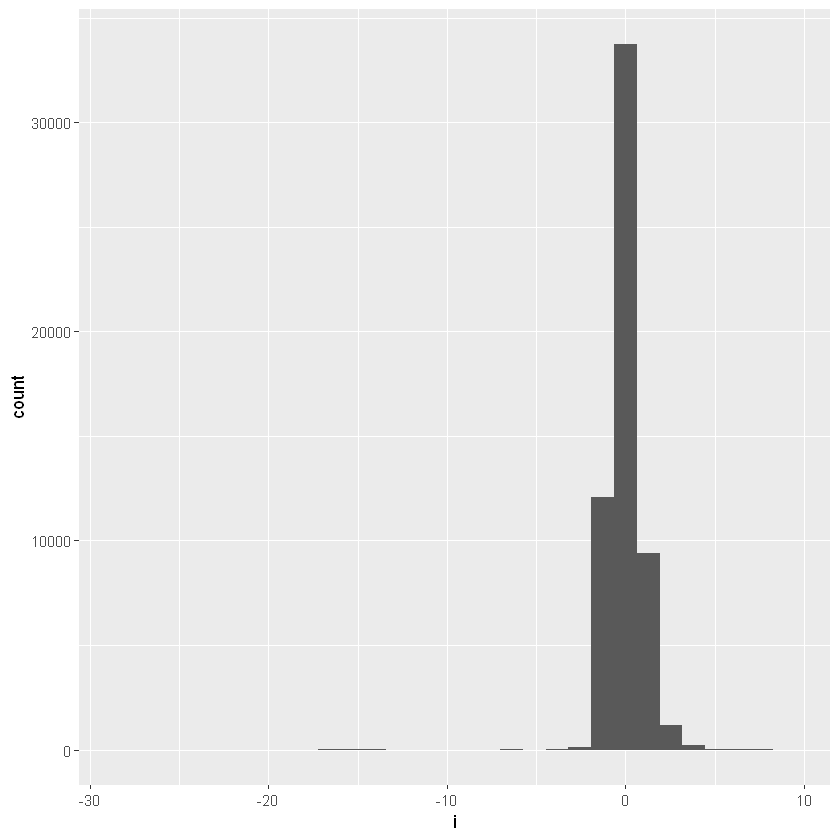

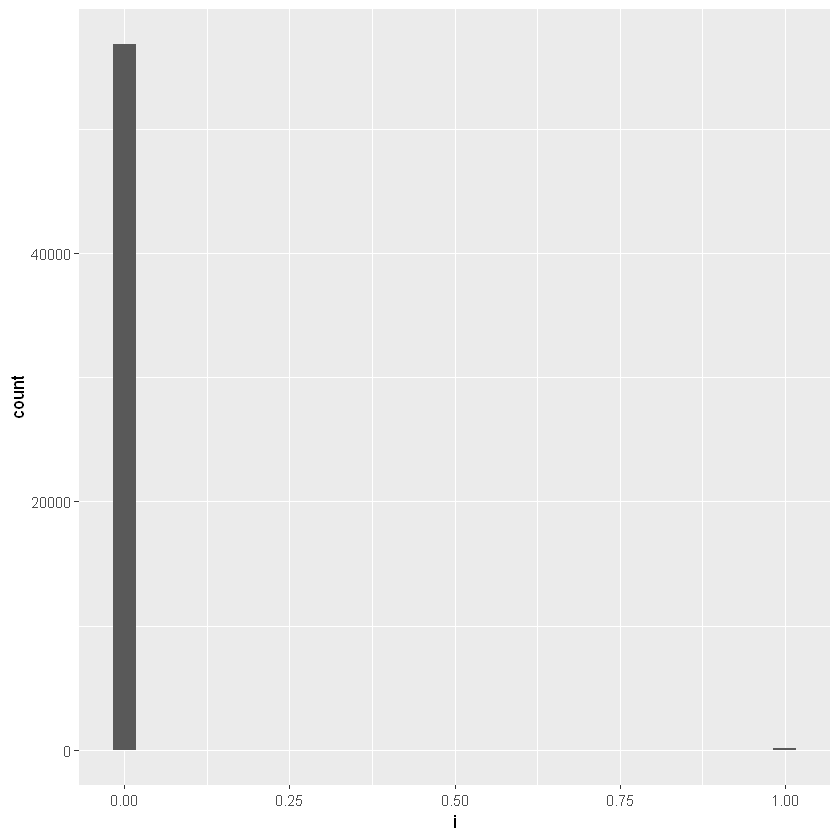

In [129]:
# check normal distributions in the subset of features
for (i in dfSub){
    print(ggplot(dfSub, aes(x=i)) + geom_histogram())
}

### Drop Non-Normal Distribution Features

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


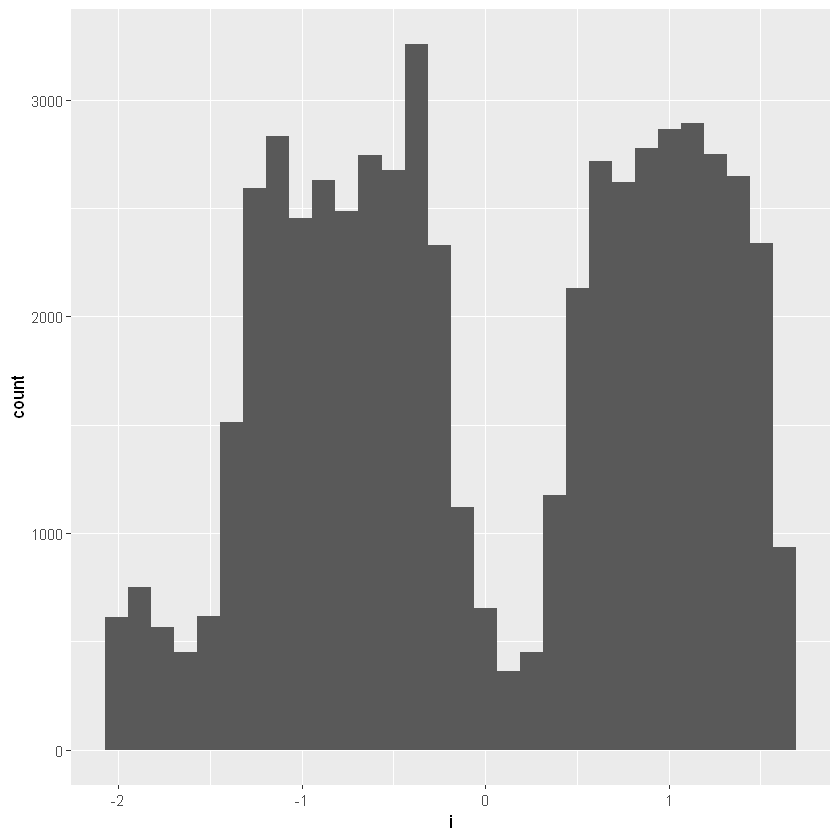

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


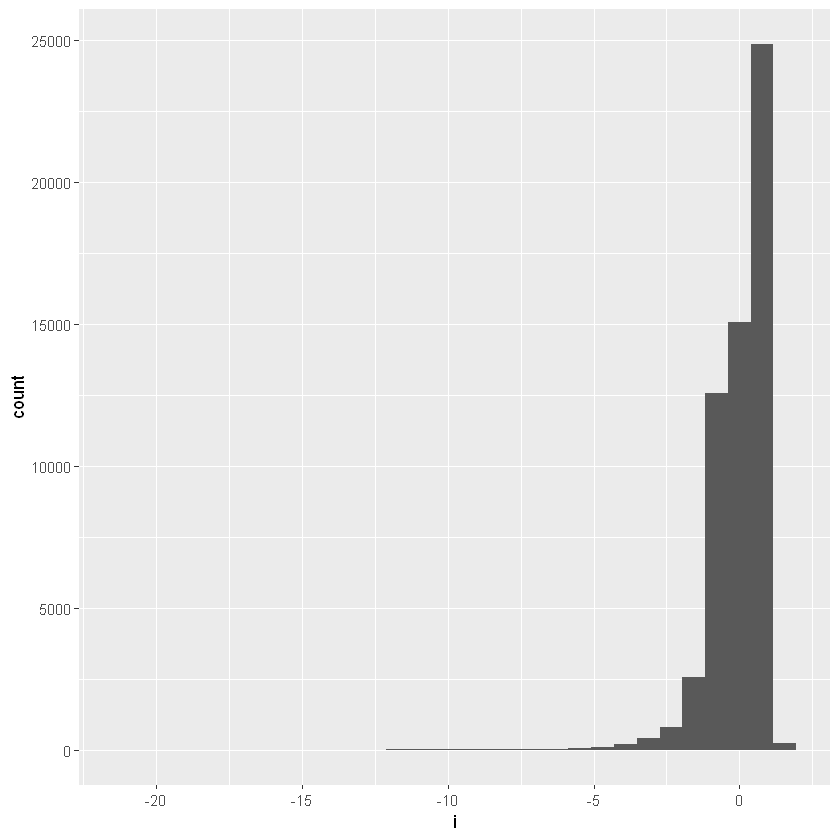

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


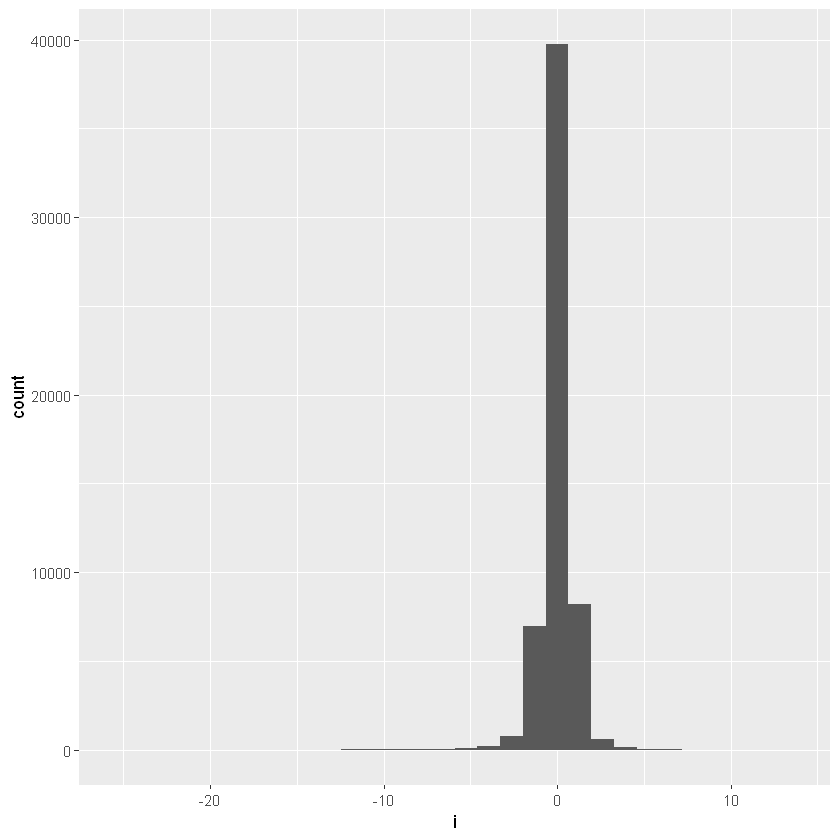

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


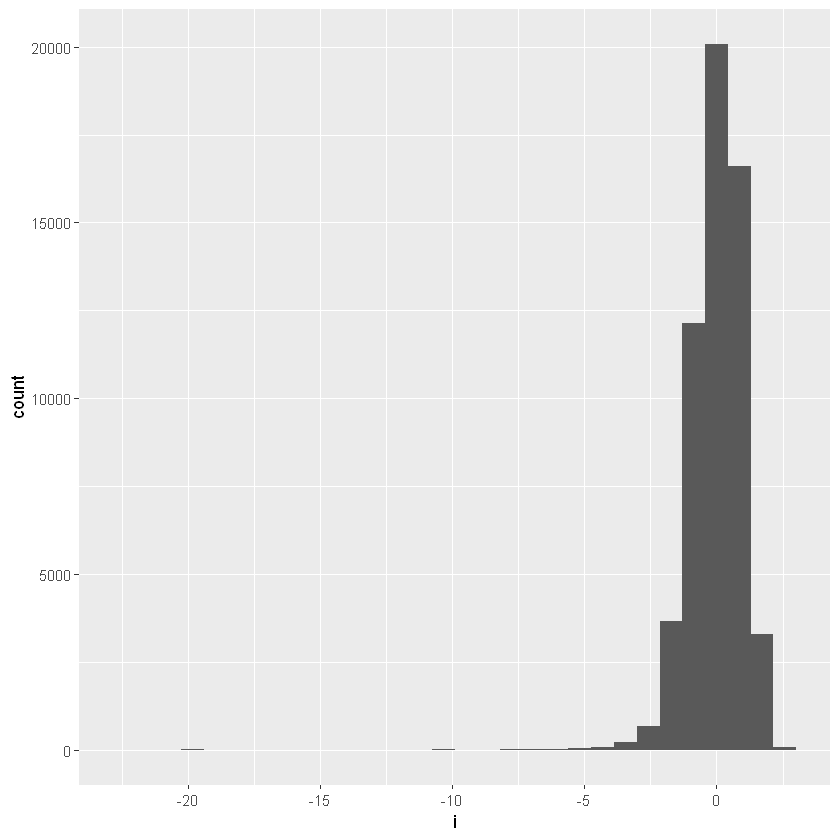

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


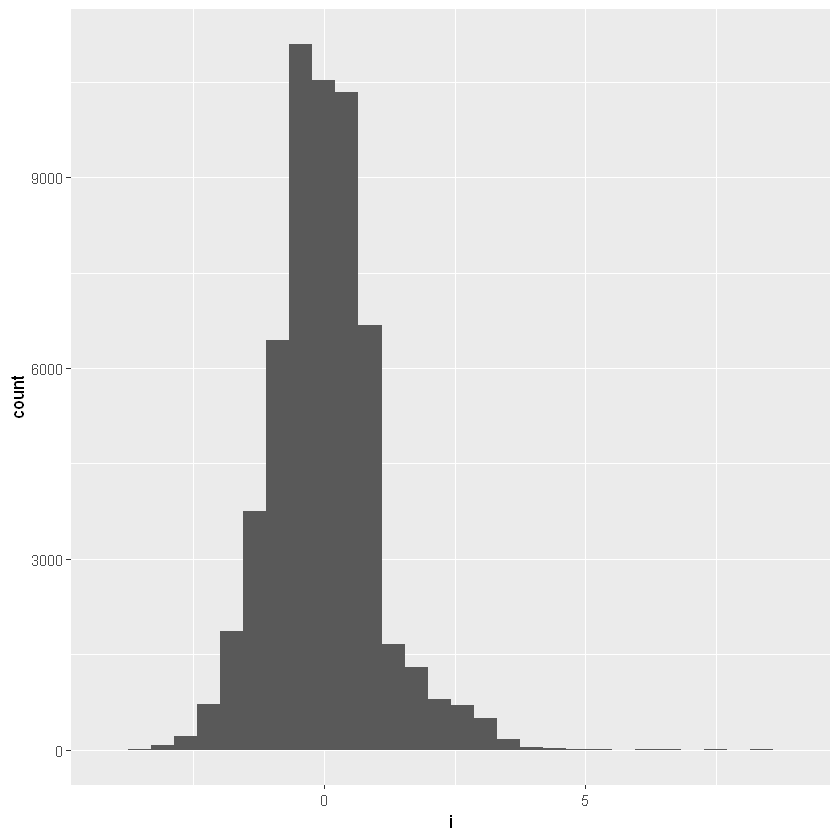

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


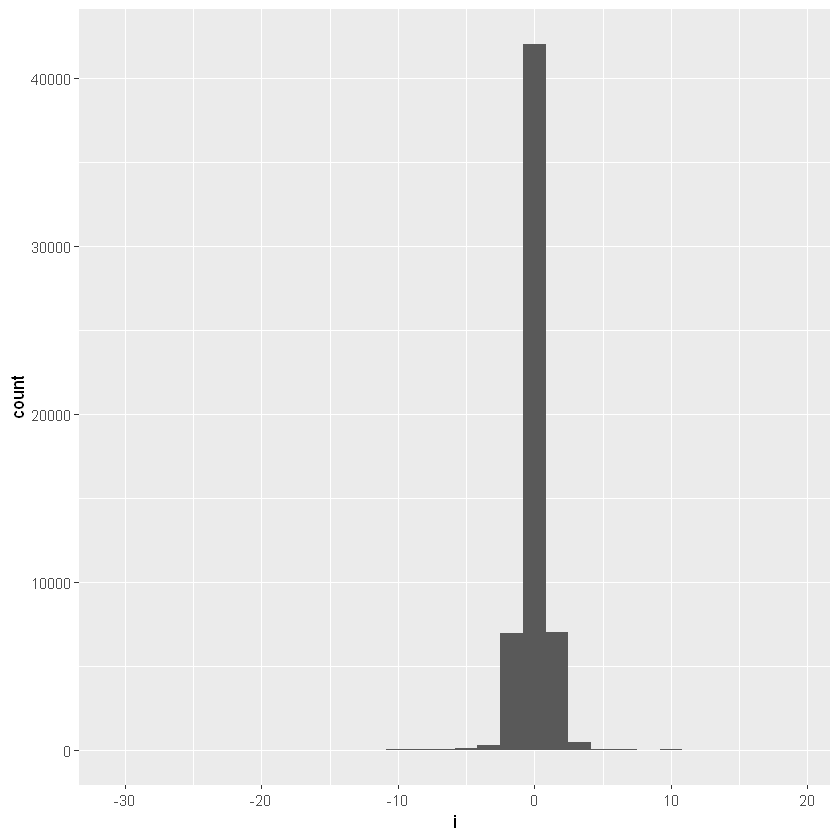

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


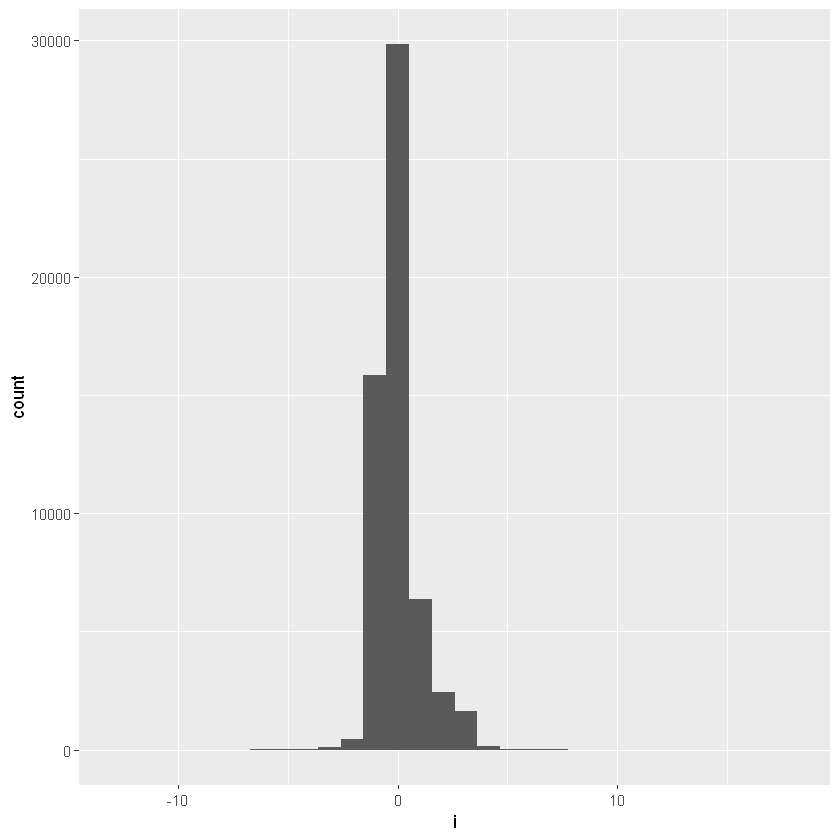

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


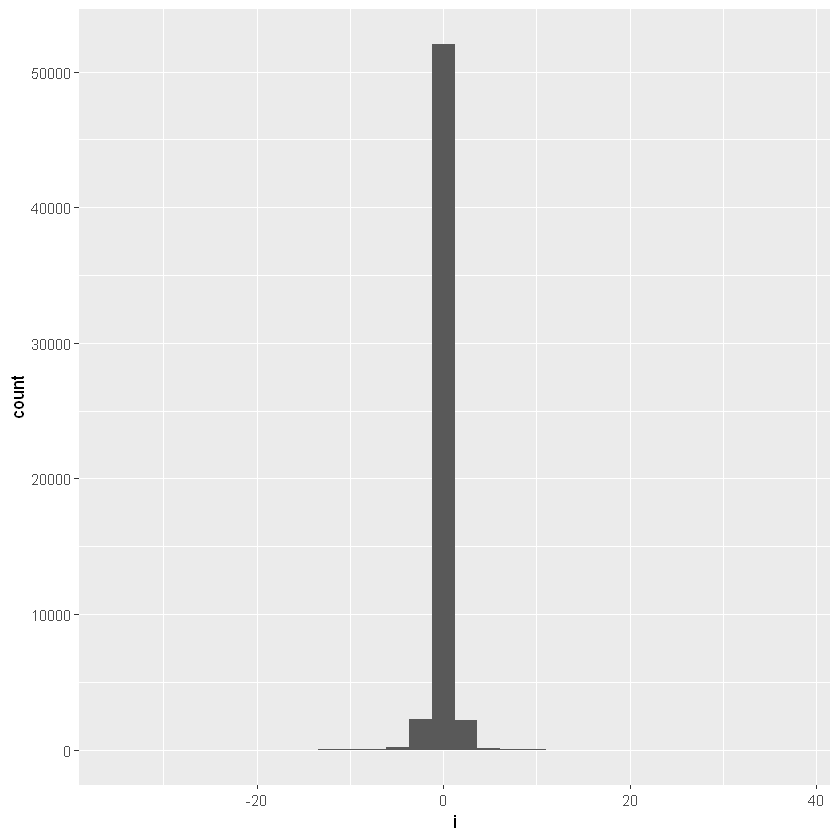

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


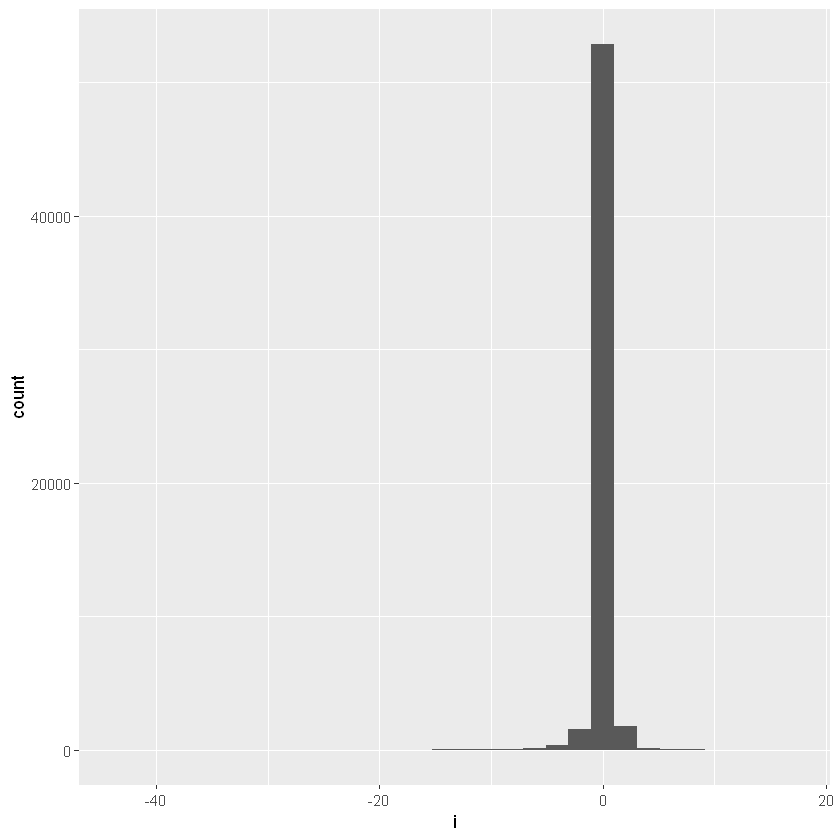

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


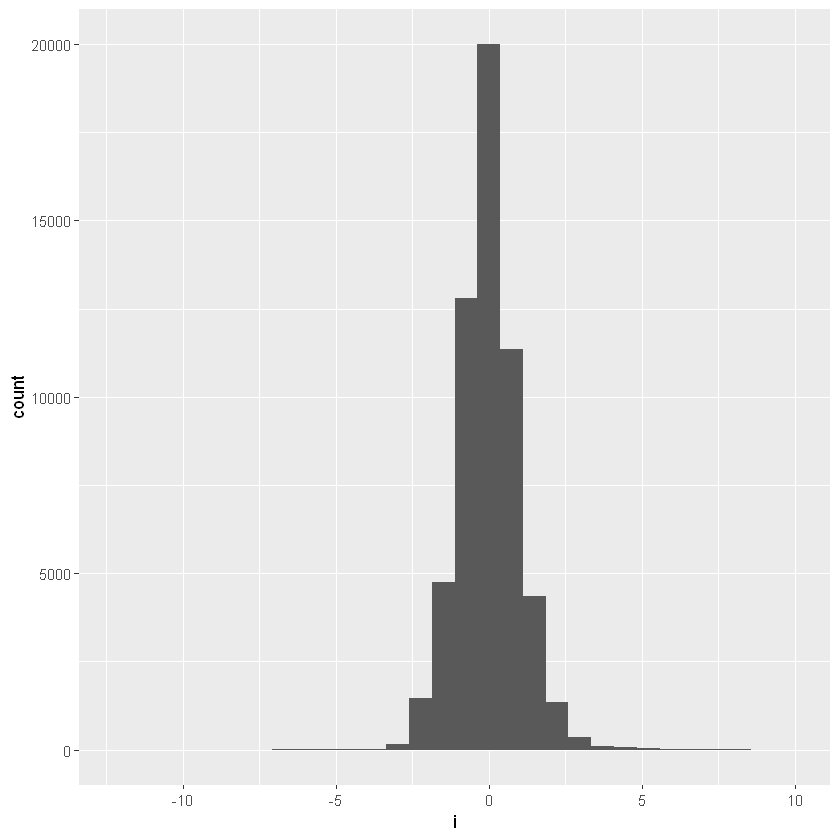

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


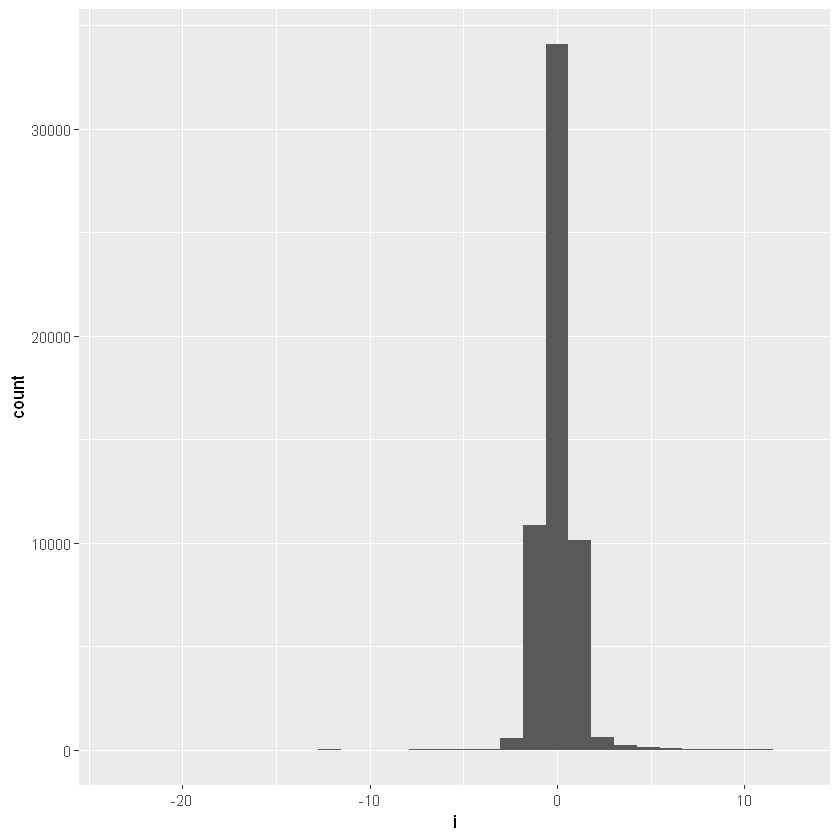

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


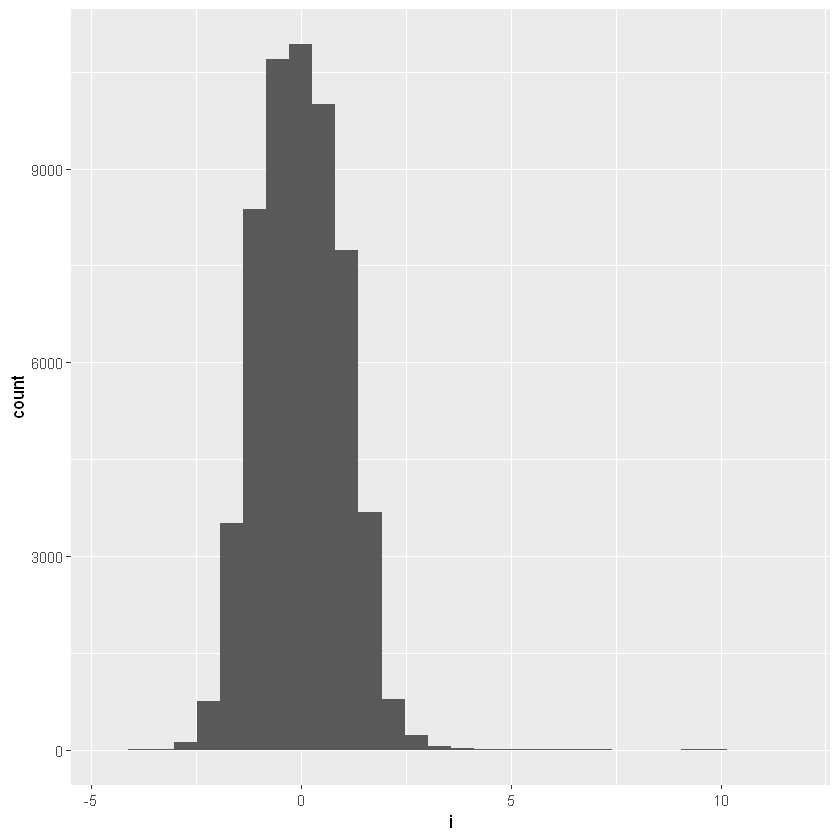

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


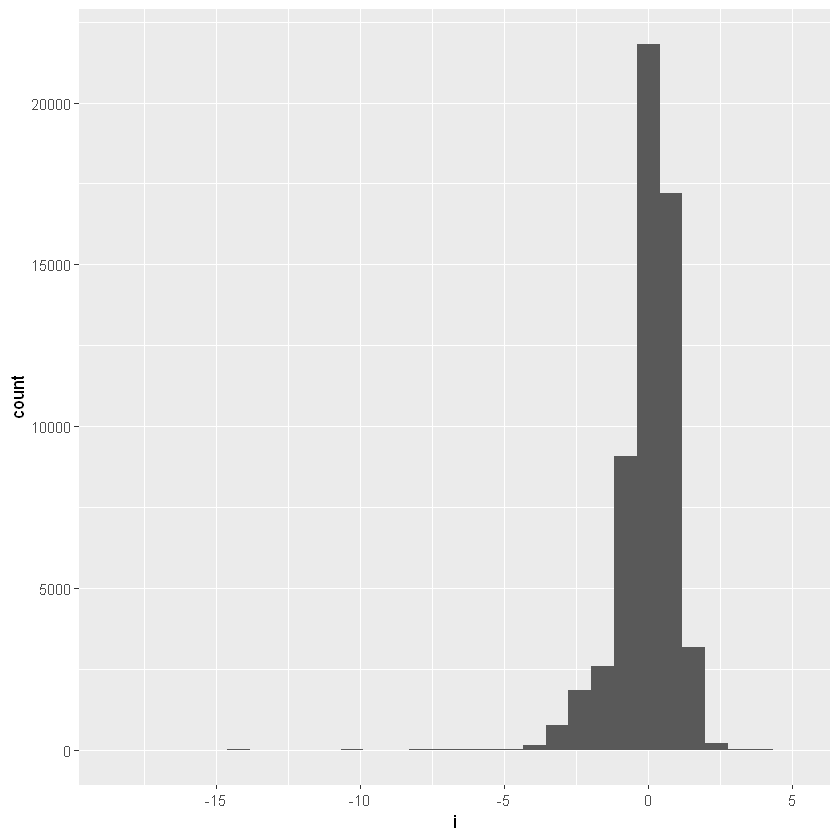

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


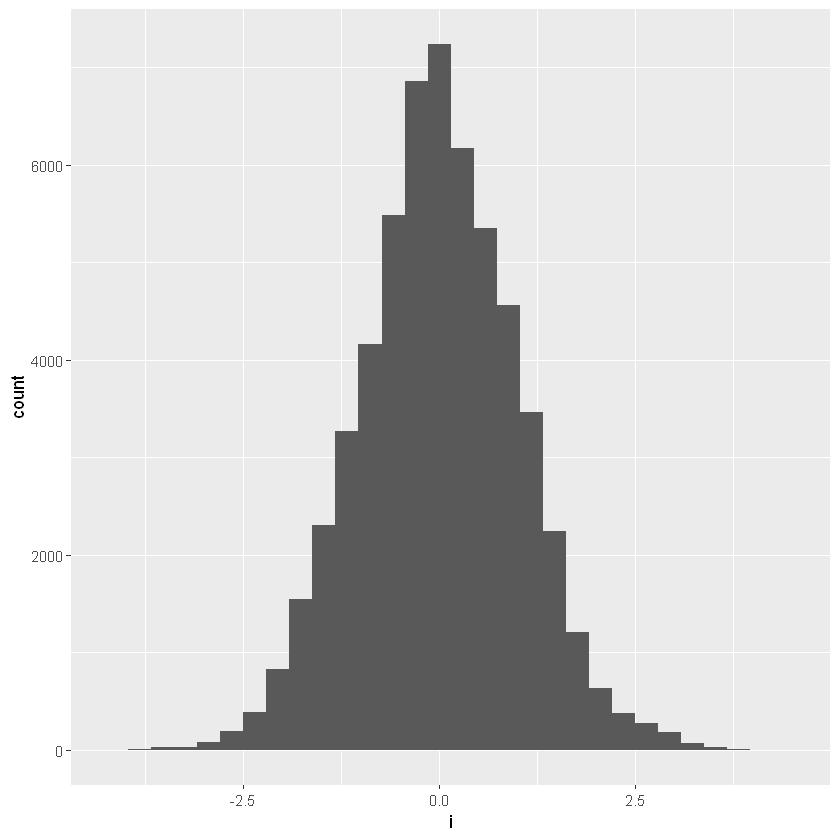

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


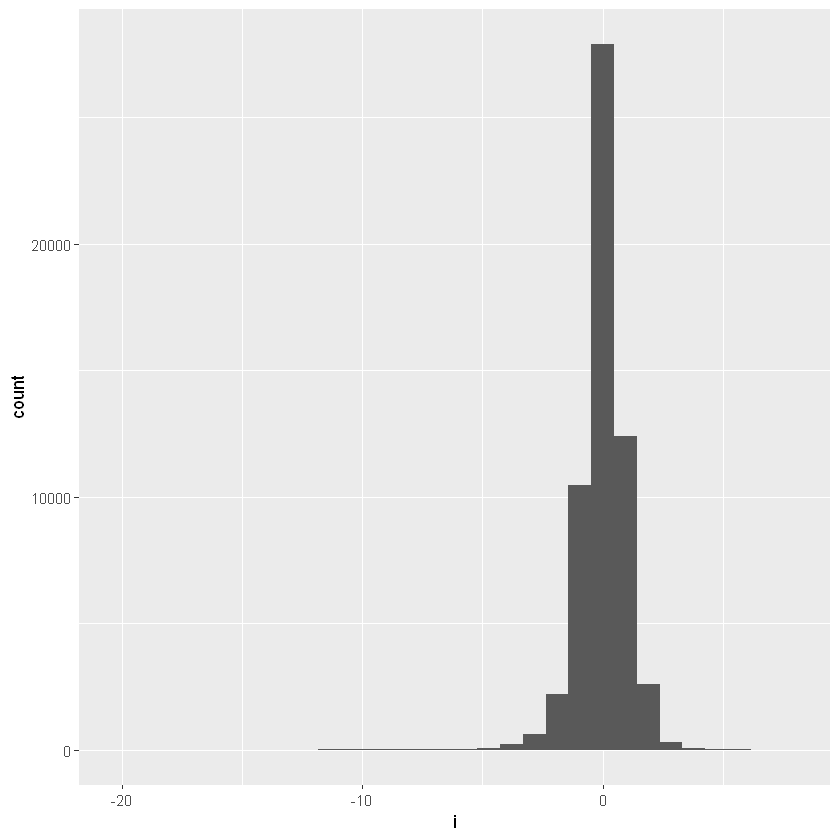

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


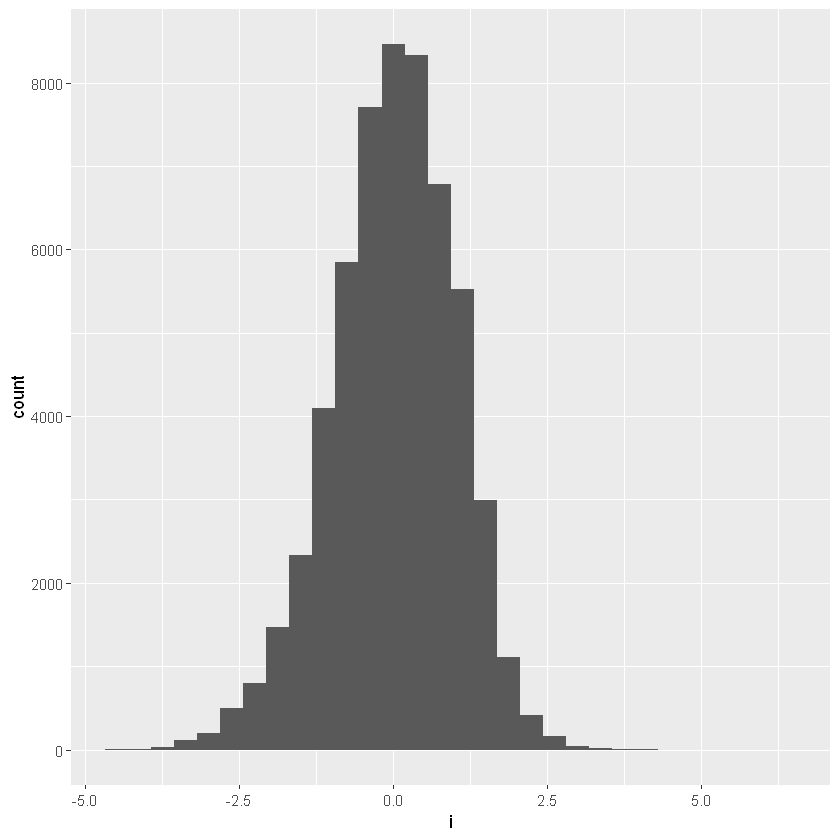

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


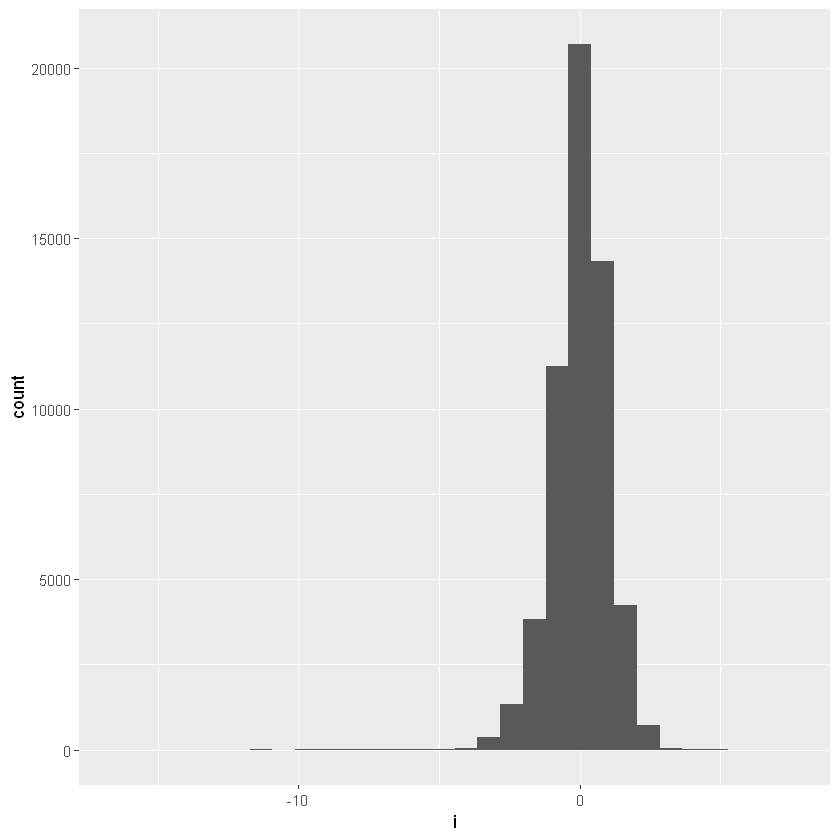

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


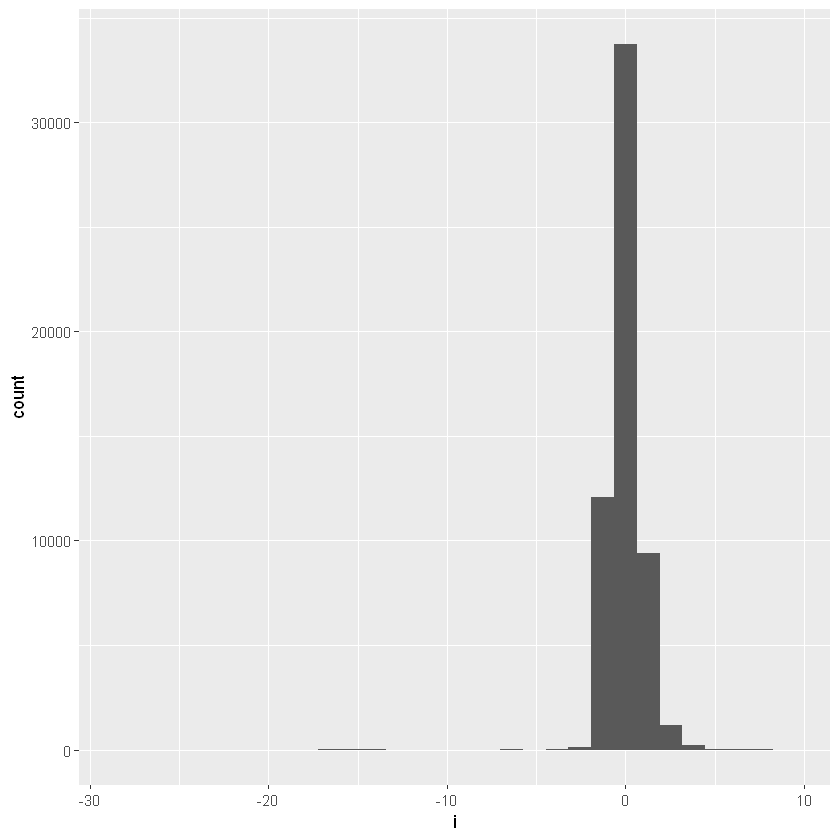

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


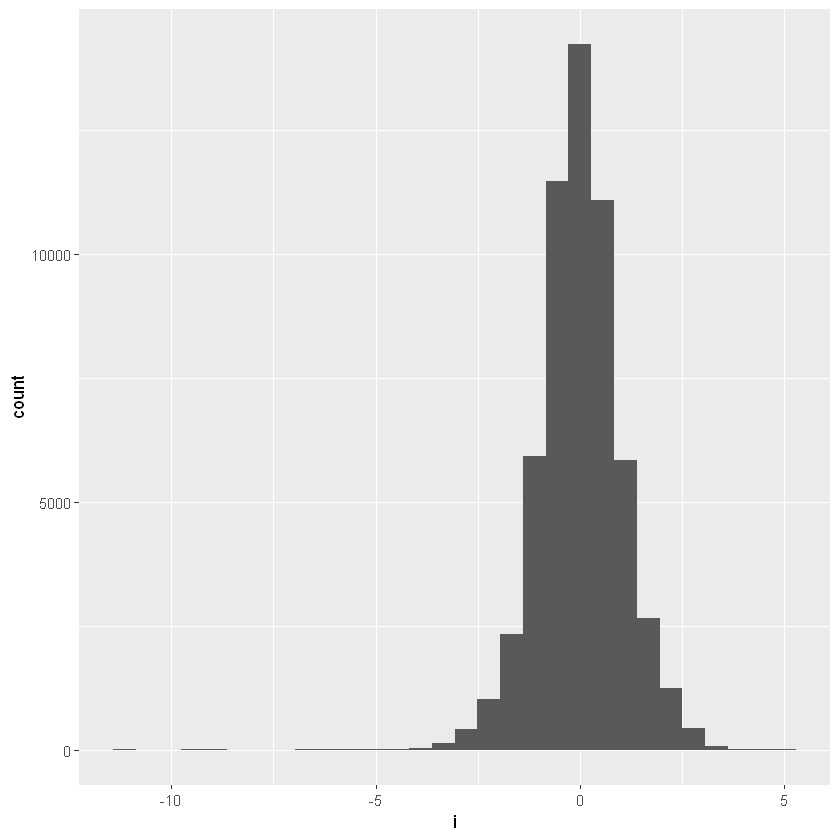

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


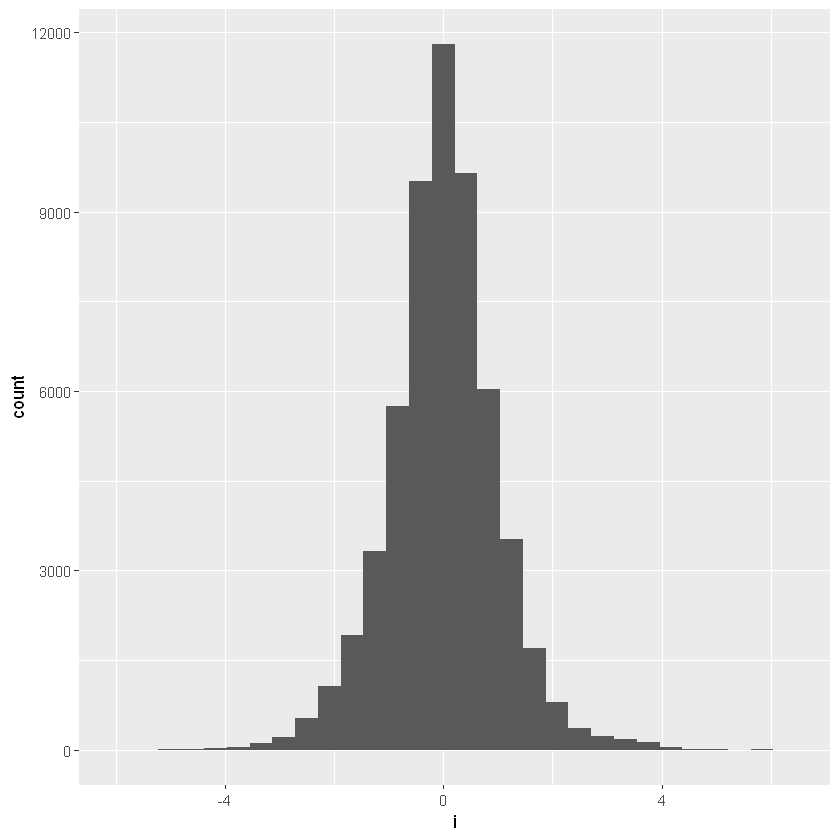

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


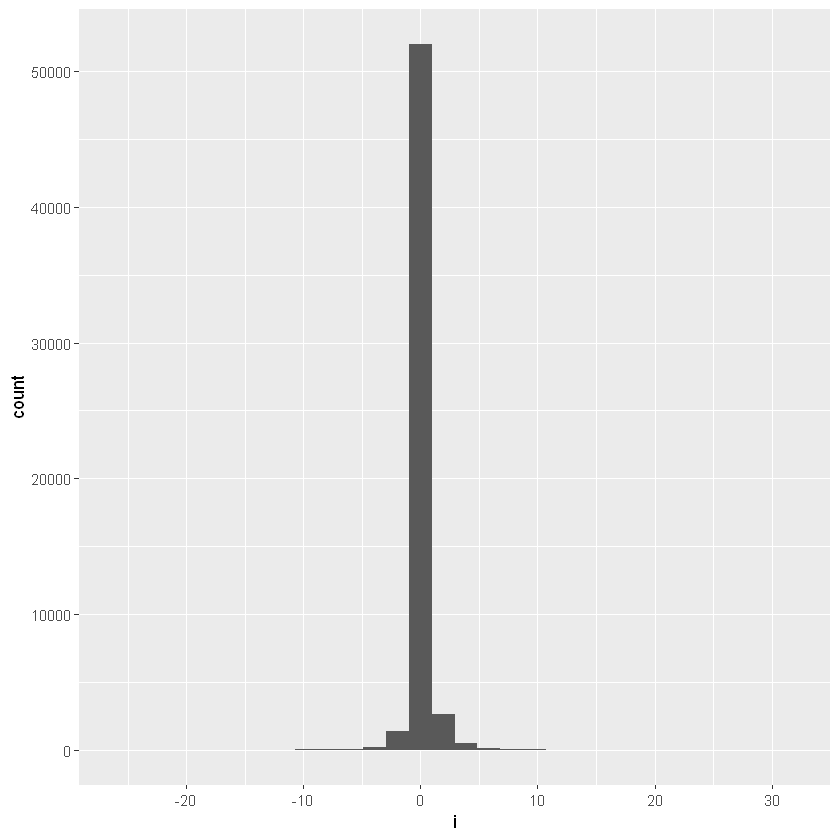

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


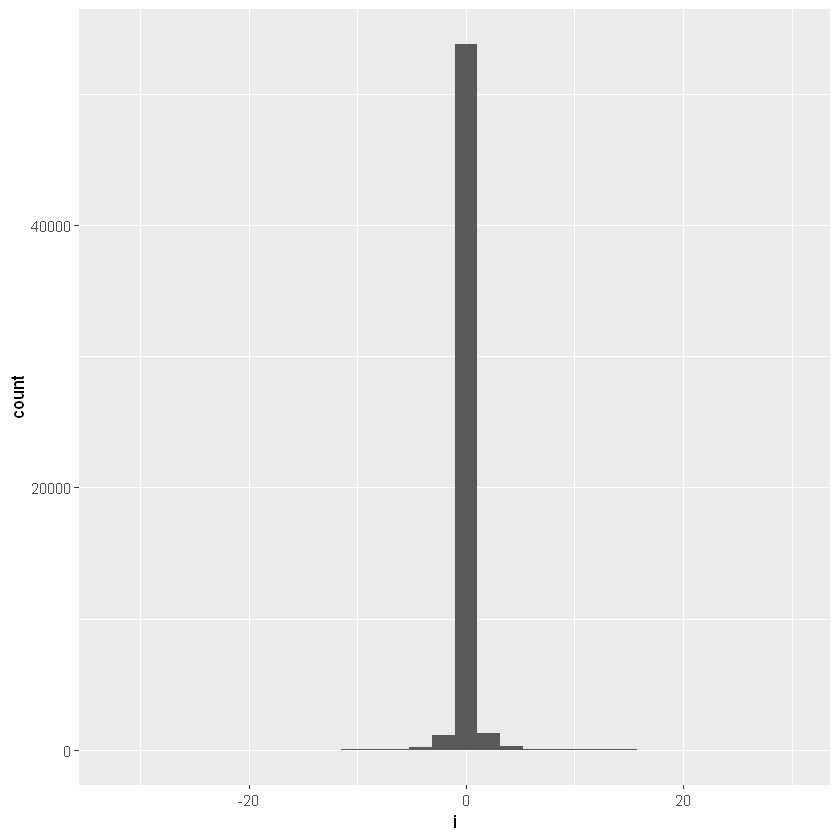

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


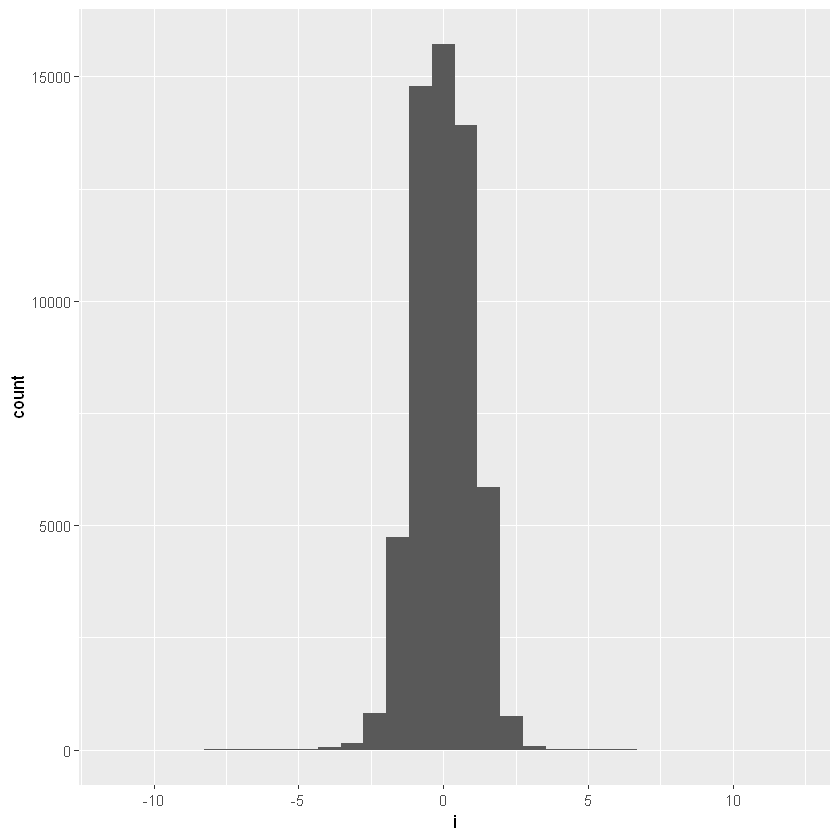

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


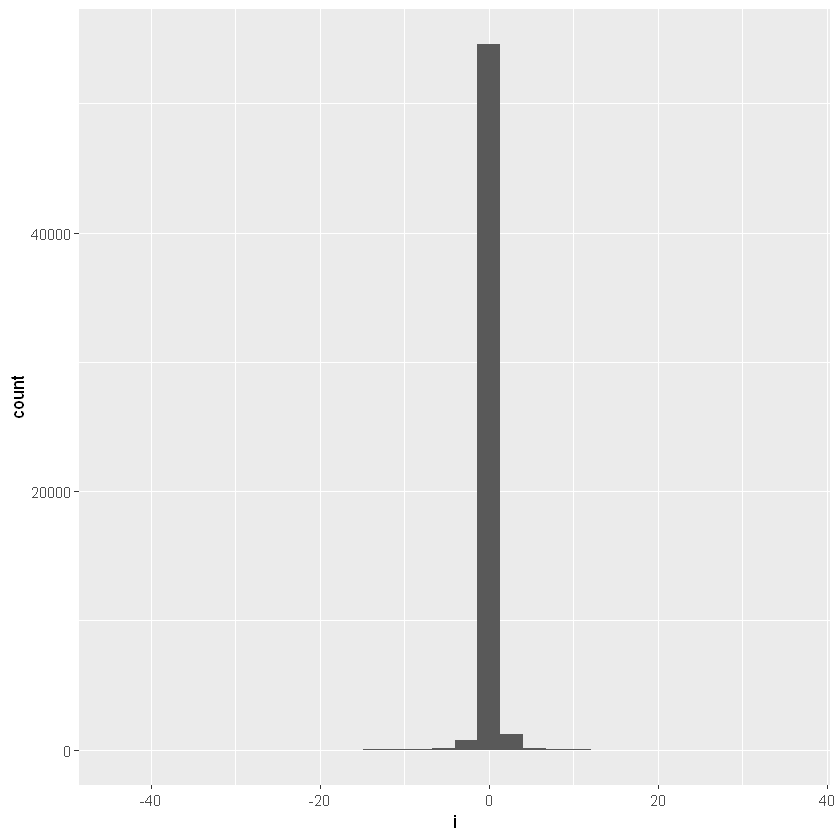

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


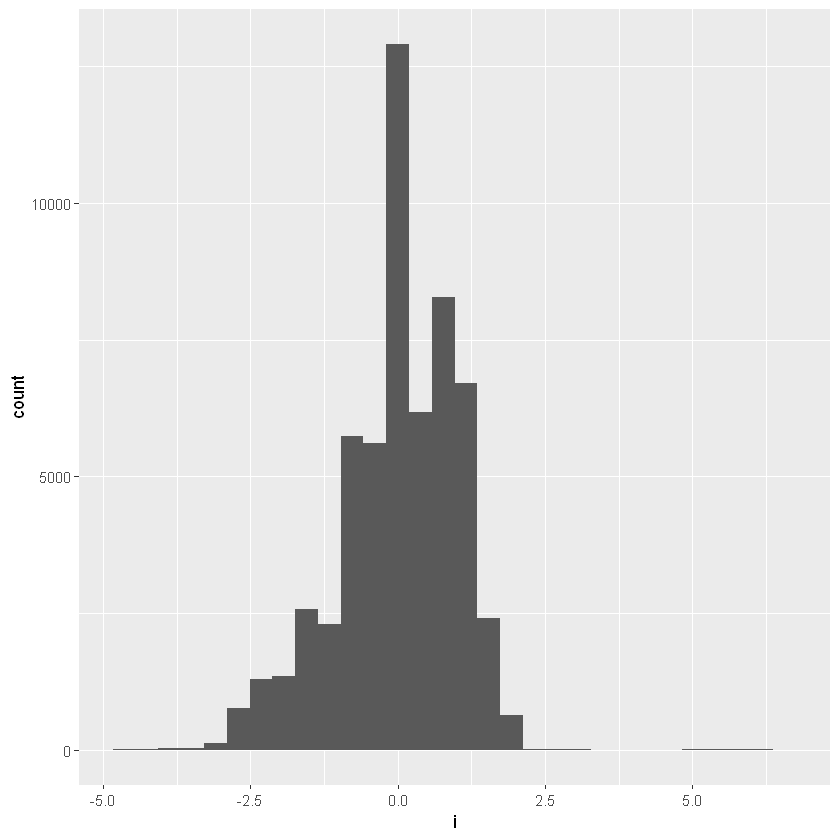

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


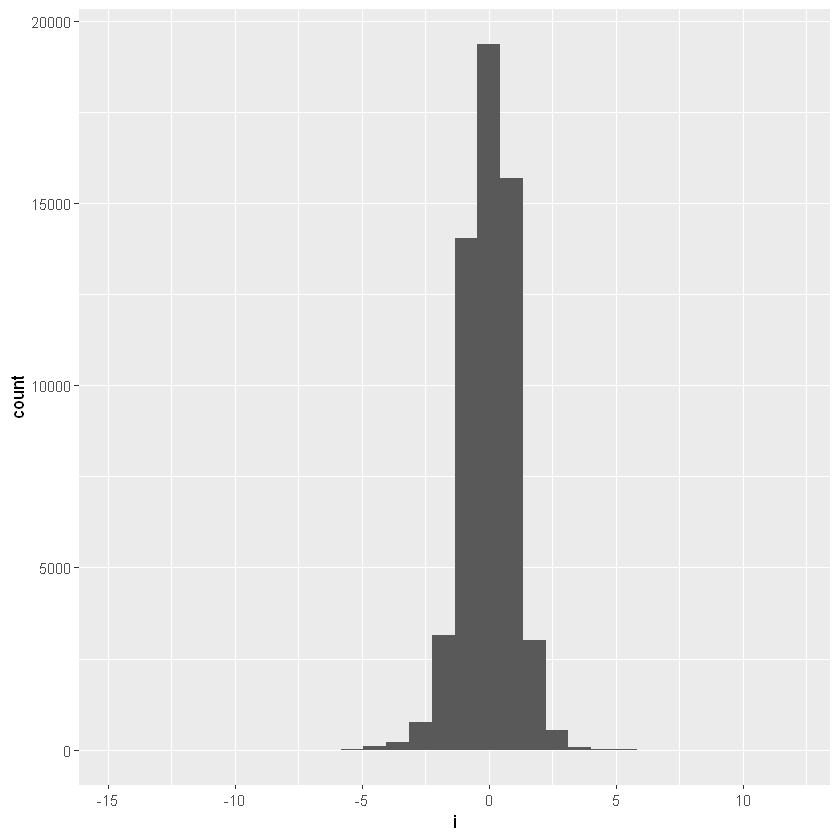

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


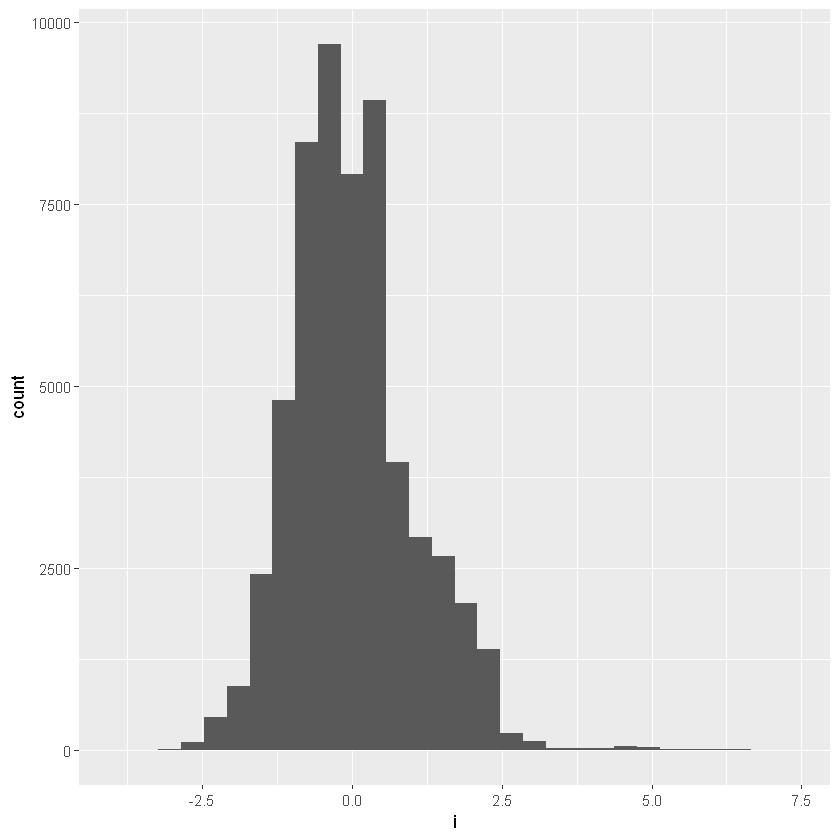

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


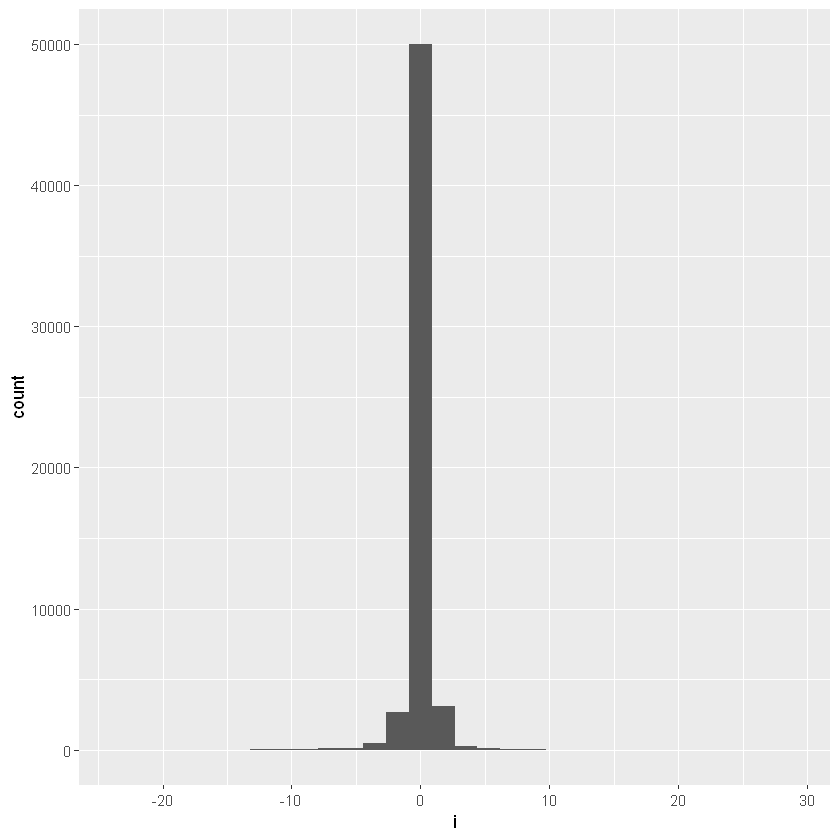

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


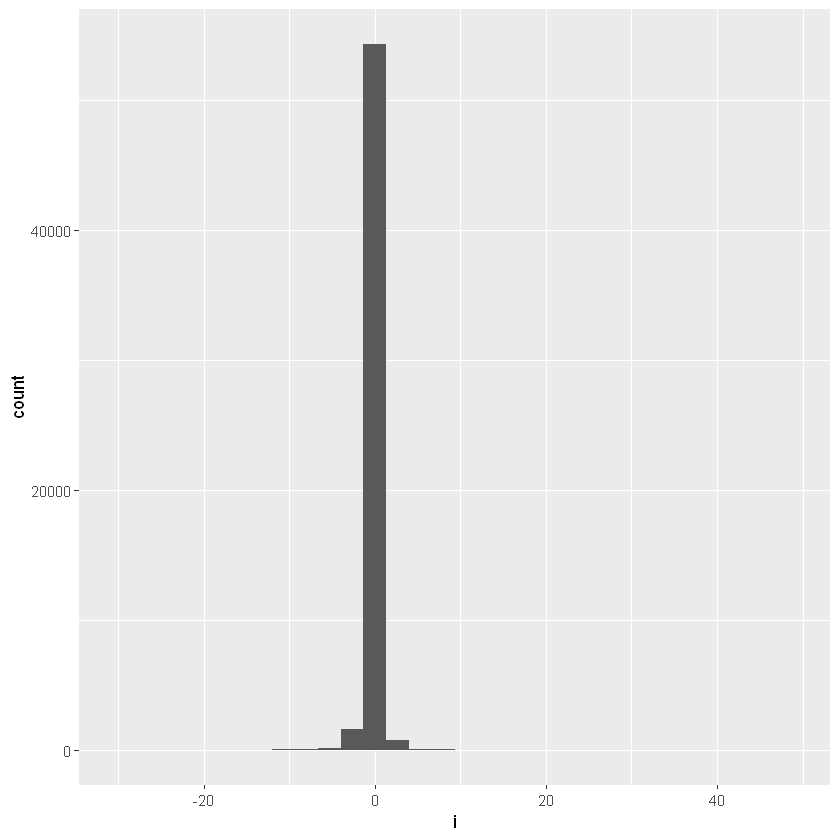

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


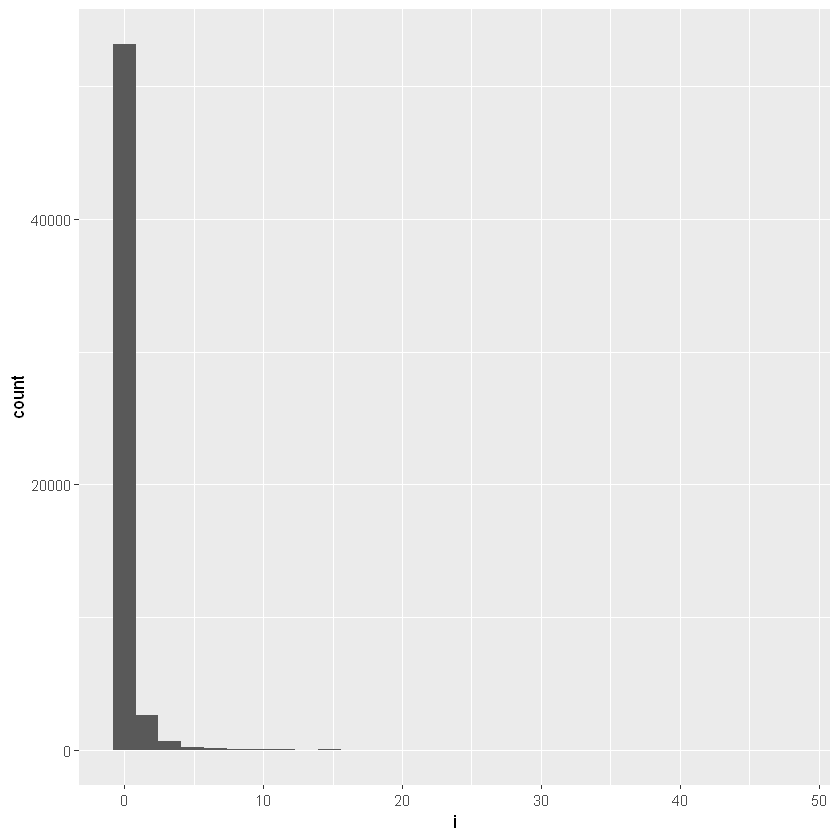

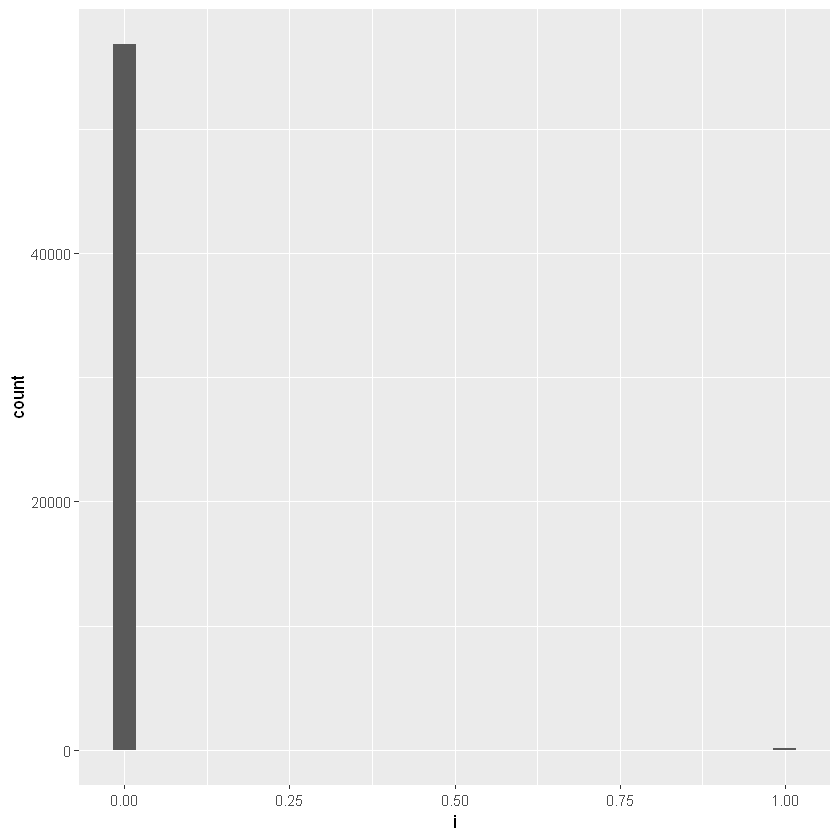

In [59]:
# check normal distributions
for (i in df){
    print(ggplot(df, aes(x=i)) + geom_histogram())
}

**Variables with non-normal distributions.**

In [7]:
# drop these features from the full dataframe (i.e., not the subset feature)
df <- dfAll[, c(3:24, 26:31)]
head(df, 2)

V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V20,V21,V22,V23,V25,V26,V27,V28,Amount,Class
-0.3135721,-0.8799915,-2.3710149,1.832820,3.3410355,-0.8045669,0.01251665,-0.9891706,-0.3395744,-0.05770153,...,0.1487577,0.674059981,-0.8824945,-0.26334793,1.0777848,-0.3662552,0.13243425,0.22821326,80.08,0
-0.3239156,0.9178714,-0.7282708,-1.180023,-0.8173157,-0.5494987,-0.05259299,1.7699065,-1.0898177,-0.38001273,...,-0.1039912,-0.008405836,0.2422148,-0.03969362,0.5116329,-0.6877417,0.09587039,0.03602943,1.00,0


In [8]:
dim(df)

[1] 56961    28

### Data Preparation

**Creating classes of TRUE and FALSE instead of 1 and 0 for one-class SVM model.**

**> Full Normal Dataset**

In [9]:
# creating classes of TRUE and FALSE in addition to 1 and 0

df$wordClass[df$Class== 1] <- "TRUE"
df$wordClass[df$Class!= 1] <- "FALSE"

In [10]:
table(df$Class)
table(df$wordClass)


    0     1 
56856   105 


FALSE  TRUE 
56856   105 

In [11]:
dim(df)

[1] 56961    29

**> Selected Subset**

In [12]:
# creating classes of TRUE and FALSE in addition to 1 and 0

dfSub$wordClass[dfSub$Class== 1] <- "TRUE"
dfSub$wordClass[dfSub$Class!= 1] <- "FALSE"

In [13]:
table(dfSub$Class)
table(dfSub$wordClass)


    0     1 
56856   105 


FALSE  TRUE 
56856   105 

**One Class SVM models are unsupervised learning models because they only train on the positive records in the dataset.  Subset the data to include only the fraud records.**

**> Full Normal Dataset**

In [14]:
# only use positive class to train so create a training subset for that
trainPositive <- subset(df, wordClass == "TRUE")

In [15]:
dim(trainPositive)

[1] 105  29

**> Selected Subset**

In [16]:
# only use positive class to train so create a training subset for that
trainPosSub <- subset(dfSub, wordClass == "TRUE")

**Split Data into Training and Testing Data**

In [17]:
# inTrain is an index created for splitting data
inTrain<-createDataPartition(1:nrow(trainPositive),p=0.6,list=FALSE)

In [19]:
head(trainPositive, 2)

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V21,V22,V23,V25,V26,V27,V28,Amount,Class,wordClass
250,2.361594,-3.171195,1.970759,0.4747614,-1.902598,-0.05517781,0.27783123,-1.7458542,-2.516628,0.8740516,...,0.4732111,0.71940030,0.1224578,-0.6192593,-0.484280,0.6835346,0.4432995,39.90,1,TRUE
1237,1.145381,-4.602878,2.091803,-0.4732239,-2.085436,-1.67124403,0.09439659,0.3377988,-4.431810,4.8719799,...,0.4014157,-0.08493342,-0.1976844,0.3875973,-0.553527,0.5162745,0.2708282,147.87,1,TRUE


**> Full Normal Dataset**

In [18]:
# training data

# select numeric columns for training df (do not include Class variable b/c using wordClass as the target)
trainpredictors<-trainPositive[inTrain, 1:27]

# select label column from training df
trainLabels<-trainPositive[inTrain, 29]

In [25]:
# testing data

# create test dataset of positive labels (all but the inTrain training set)
testPositive<-trainPositive[-inTrain,]

# create a negative class for testing
testNegative<-subset(df, wordClass== "FALSE")

# combine the test datasets 
testPosNeg<-rbind(testPositive, testNegative)

# select numeric columns for test df
testpredictors<-testPosNeg[,1:27]

# select label column from test df
testLabels<-testPosNeg[,29]

**> Selected Subset**

In [26]:
# training data

# select numeric columns for training df (do not include Class variable b/c using wordClass as the target)
trainpredictorsSub<-trainPosSub[inTrain, 1:5]

# select label column from training df
trainLabelsSub<-trainPosSub[inTrain, 7]

In [27]:
# testing data

# create test dataset of positive labels (all but the inTrain training set)
testPosSub<-trainPosSub[-inTrain,]

# create a negative class for testing
testNegSub<-subset(dfSub, wordClass== "FALSE")

# combine the test datasets 
testPosNegSub<-rbind(testPosSub, testNegSub)

# select numeric columns for test df
testpredictorsSub<-testPosNegSub[,1:5]

# select label column from test df
testLabelsSub<-testPosNegSub[,7]

## One Class SVM Model

**> Full Normal Dataset**

In [28]:
# svm model; parameters are the numeric features from the training df

# use cross-validation
set.seed(123)
train.control <- trainControl(method = "cv", number = 10) 

svm.model<-svm(trainpredictors, y=NULL,
           type='one-classification',
           nu=0.10,
           gamma = .05,
               # data already scaled
           scale=FALSE,
           kernel="radial", trControl = train.control)

**> Selected Subset**

In [29]:
# svm model; parameters are the numeric features from the training df

# use cross-validation
set.seed(123) 
train.control <- trainControl(method = "cv", number = 10) 

svmSub.model<-svm(trainpredictorsSub, y=NULL,
           type='one-classification',
           nu=0.10,
           gamma = .05,
               # data already scaled
           scale=FALSE,
           kernel="radial", trControl = train.control)

### Predictions

**> Full Normal Dataset**

In [30]:
# make predictions
svm.predtrain<-predict(svm.model,trainpredictors)
svm.predtest<-predict(svm.model,testpredictors)

In [31]:
# compare predictions to true labels
confTrain<-table(Predicted=svm.predtrain, Reference=trainLabels)
confTest<-table(Predicted=svm.predtest, Reference=testLabels)

In [32]:
# test confusion matrix
confusionMatrix(confTest, positive='TRUE')

Confusion Matrix and Statistics

         Reference
Predicted FALSE  TRUE
    FALSE 56856    39
    TRUE      0     1
                                          
               Accuracy : 0.9993          
                 95% CI : (0.9991, 0.9995)
    No Information Rate : 0.9993          
    P-Value [Acc > NIR] : 0.4789          
                                          
                  Kappa : 0.0487          
                                          
 Mcnemar's Test P-Value : 0.000000001166  
                                          
            Sensitivity : 0.02500000      
            Specificity : 1.00000000      
         Pos Pred Value : 1.00000000      
         Neg Pred Value : 0.99931453      
             Prevalence : 0.00070304      
         Detection Rate : 0.00001758      
   Detection Prevalence : 0.00001758      
      Balanced Accuracy : 0.51250000      
                                          
       'Positive' Class : TRUE            
                      

**> Selected Subset**

In [33]:
# make predictions
svmSub.predtrain<-predict(svmSub.model,trainpredictorsSub)
svmSub.predtest<-predict(svmSub.model,testpredictorsSub)

In [34]:
# compare predictions to true labels
confTrainSub<-table(Predicted=svmSub.predtrain, Reference=trainLabelsSub)
confTestSub<-table(Predicted=svmSub.predtest, Reference=testLabelsSub)

In [35]:
# test confusion matrix
confusionMatrix(confTestSub, positive='TRUE')

Confusion Matrix and Statistics

         Reference
Predicted FALSE  TRUE
    FALSE 41193    21
    TRUE  15663    19
                                             
               Accuracy : 0.7243             
                 95% CI : (0.7206, 0.728)    
    No Information Rate : 0.9993             
    P-Value [Acc > NIR] : 1                  
                                             
                  Kappa : 0.001              
                                             
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 0.4750000          
            Specificity : 0.7245146          
         Pos Pred Value : 0.0012116          
         Neg Pred Value : 0.9994905          
             Prevalence : 0.0007030          
         Detection Rate : 0.0003339          
   Detection Prevalence : 0.2756257          
      Balanced Accuracy : 0.5997573          
                                             
       '

## Compare with Supervised Model

### In order to analyze how well the One Class SVM model may have performed, I also tested a supervised SVM model on the data.

**Data for classification model and predictions; to compare with One-Class SVM model**

In [64]:
# import full dataset to be underbalanced
underDf <- read.csv('creditcard.csv')

In [65]:
dim(underDf)

[1] 284807     31

**Create Subset for Selected Features from Feature Selection**

In [66]:
dfSubClass <- underDf[, c(5:5, 11:11, 13:13, 15:15, 18:18, 31:31)]
head(dfSubClass, 2)

V4,V10,V12,V14,V17,Class
1.3781552,0.09079417,-0.6178009,-0.3111694,0.2079712,0
0.4481541,-0.16697441,1.0652353,-0.1437723,-0.1148047,0


### Data Preparation

**Remove non-normal features**

In [67]:
# remove non-normal features
dfClass <- underDf[, c(3:24, 26:31)]
head(underDf, 3)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,...,-0.01830678,0.2778376,-0.1104739,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.191857,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,...,-0.22577525,-0.6386720,0.1012880,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.358354,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,...,0.24799815,0.7716794,0.9094123,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0


In [96]:
dim(dfClass)

[1] 284807     28

**Split the data into training and test data**

**> Full Normal Dataset**

In [68]:
set.seed(103) 
sample = sample.split(dfClass$Amount, SplitRatio = .80)
TrainClass = subset(dfClass, sample == TRUE)
TestClass  = subset(dfClass, sample == FALSE)

In [97]:
dim(TrainClass)

[1] 828  28

In [98]:
dim(TestClass)

[1] 52892    28

**> Selected Subset**

In [69]:
set.seed(103) 
sample2 = sample.split(dfSubClass$V4, SplitRatio = .80)
TrainClassSub = subset(dfSubClass, sample2 == TRUE)
TestClassSub  = subset(dfSubClass, sample2 == FALSE)

**Undersample Training Data Only**

**Because the dataset is highly imbalanced with respect to the percent of records with fraud labels (0.17%) versus records with non-fraud labels (99.83%), the training data was under sampled data for the comparison supervised models.**

**> Full Normal Dataset**

In [70]:
table(TrainClass$Class)


     0      1 
231501    414 

In [71]:
# Random Under-Sampling (RUS)

# set the number of non-fraud records to under sample to
n_fraud <- 414
new_frac_fraud <- 0.50
new_n_total <- n_fraud/new_frac_fraud

undersampling_result <- ovun.sample(Class ~ .,
                                   data = TrainClass,
                                   method = "under",
                                   N = new_n_total,
                                   seed =123)

TrainClass <- undersampling_result$data

table(TrainClass$Class)


  0   1 
414 414 

**> Select Feature Subset**

In [72]:
table(TrainClassSub$Class)


     0      1 
227453    392 

In [73]:
# Random Under-Sampling (RUS)

# set the number of non-fraud records to under sample to
n_fraud <- 392
new_frac_fraud <- 0.50
new_n_total <- n_fraud/new_frac_fraud

undersampling_result <- ovun.sample(Class ~ .,
                                   data = TrainClassSub,
                                   method = "under",
                                   N = new_n_total,
                                   seed =123)

TrainClassSub <- undersampling_result$data

table(TrainClassSub$Class)


  0   1 
392 392 

**Separate Predictor Features from Target Feature**

**> Full Normal Dataset**

In [74]:
# drop the target variable
XTrainClass <- TrainClass[, c(1:27)]
yTrainClass <- subset(TrainClass, select=c("Class"))

XTestClass <- TestClass[, c(1:27)]
yTestClass <- subset(TestClass, select=c("Class"))

**> Select Features Subset**

In [75]:
# drop the target variable
yTrainClassSub <- subset(TrainClassSub, select=c("Class"))
yTestClassSub <- subset(TestClassSub, select=c("Class"))
XTrainClassSub <- TrainClassSub[, c(1:5)]
XTestClassSub <- TestClassSub[, c(1:5)]

### Modeling

**> Full Normal Dataset**

In [76]:
# SVM model with original class labels as the target variable

# use cross-validation
set.seed(123)
train.control <- trainControl(method = "cv", number = 10)

svmModel <- svm(Class ~ ., data = TrainClass,
           type='C-classification',
           gamma = .05,
               # data already scaled
           scale=FALSE,
           kernel="radial", trControl = train.control)



**> Selected Subset**

In [77]:
# SVM model with original class labels as the target variable

# use cross-validation
set.seed(123)
train.control <- trainControl(method = "cv", number = 10)

svmModelSub <- svm(Class ~ ., data = TrainClassSub,
           type='C-classification',
           gamma = .05,
               # data already scaled
           scale=FALSE,
           kernel="radial", trControl = train.control)

### Predictions

**> Full Normal Dataset** 

In [99]:
# predictions on training data

# make predictions with SVM model
predSVM <- predict(svmModel, XTrainClass)


In [100]:
predSVM <- as.numeric(as.character(predSVM))

In [101]:
# predictions on Test data
predSVMTest <- predict(svmModel, XTestClass)


In [102]:
predSVMTest <- as.numeric(as.character(predSVMTest))

**> Selected Subset**

In [103]:
# predictions on training data

# make predictions with SVM model
predSVMsub <- predict(svmModelSub, XTrainClassSub)
predSVMsub <- as.numeric(as.character(predSVMsub))

In [104]:
# predictions on Test data
predSVMTestSub <- predict(svmModelSub, XTestClassSub)
predSVMTestSub <- as.numeric(as.character(predSVMTestSub))

### Evaluation

**> Full Normal Dataset**

**Training Data**

**> Confusion Matrix**

In [84]:
# https://www.journaldev.com/47628/f1-score-in-r

#error metrics -- Confusion Matrix
err_metric=function(CM)
{
  TN =CM[1,1]
  TP =CM[2,2]
  FP =CM[1,2]
  FN =CM[2,1]
  precision =(TP)/(TP+FP)
  recall_score =(TP)/(TP+FN)
 
  f1_score=2*((precision*recall_score)/(precision+recall_score))
  accuracy_model  =(TP+TN)/(TP+TN+FP+FN)
  False_positive_rate =(FP)/(FP+TN)
  False_negative_rate =(FN)/(FN+TP)
 
  print(paste("Precision value of the model: ",round(precision,2)))
  print(paste("Accuracy of the model: ",round(accuracy_model,2)))
  print(paste("Recall value of the model: ",round(recall_score,2)))
  print(paste("False Positive rate of the model: ",round(False_positive_rate,2)))
 
  print(paste("False Negative rate of the model: ",round(False_negative_rate,2)))
 
  print(paste("f1 score of the model: ",round(f1_score,2)))
}



In [105]:
# make confusion matrix of SVC training predictions
predSVM <- ifelse(predSVM > 0.5,1,0) # Probability check
CM= table(yTrainClass$Class, predSVM)
print(CM)
err_metric(CM)

   predSVM
      0   1
  0 413   1
  1  11 403
[1] "Precision value of the model:  1"
[1] "Accuracy of the model:  0.99"
[1] "Recall value of the model:  0.97"
[1] "False Positive rate of the model:  0"
[1] "False Negative rate of the model:  0.03"
[1] "f1 score of the model:  0.99"


**> F1 and Recall Scores**

In [107]:
# calculate F1 and Recall scores on SVC training predictions
F1_Score(y_pred = predSVM, y_true = yTrainClass$Class, positive = "1")
Recall(y_pred = predSVM, y_true = yTrainClass$Class, positive = "1")

[1] 0.9853301

[1] 0.97343

**Testing Data**

**> Confusion Matrix**

In [108]:
# make confusion matrix of SVC testing predictions
predSVMTest <- ifelse(predSVMTest > 0.5,1,0) # Probability check
CM= table(yTestClass$Class, predSVMTest)
print(CM)
err_metric(CM)

   predSVMTest
        0     1
  0 45709  7105
  1     5    73
[1] "Precision value of the model:  0.01"
[1] "Accuracy of the model:  0.87"
[1] "Recall value of the model:  0.94"
[1] "False Positive rate of the model:  0.13"
[1] "False Negative rate of the model:  0.06"
[1] "f1 score of the model:  0.02"


**> F1 and Recall Scores**

In [109]:
# calculate F1 and Recall scores on SVC testing predictions
F1_Score(y_pred = predSVMTest, y_true = yTestClass$Class, positive = "1")
Recall(y_pred = predSVMTest, y_true = yTestClass$Class, positive = "1")

[1] 0.02012128

[1] 0.9358974

**Evaluation of Selected Subset Data** 

**Training Data**

**> Confusion Matrix**

In [110]:
# make confusion matrix of SVC training predictions
predSVMsub <- ifelse(predSVMsub > 0.5,1,0) # Probability check
CM= table(yTrainClassSub$Class, predSVMsub)
print(CM)
err_metric(CM)

   predSVMsub
      0   1
  0 391   1
  1  38 354
[1] "Precision value of the model:  1"
[1] "Accuracy of the model:  0.95"
[1] "Recall value of the model:  0.9"
[1] "False Positive rate of the model:  0"
[1] "False Negative rate of the model:  0.1"
[1] "f1 score of the model:  0.95"


**> F1 and Recall Scores**

In [112]:
# calculate F1 and Recall scores on SVC training predictions
F1_Score(y_pred = predSVMsub, y_true = yTrainClassSub$Class, positive = "1")
Recall(y_pred = predSVMsub, y_true = yTrainClassSub$Class, positive = "1")

[1] 0.9477912

[1] 0.9030612

**Testing Data**

**> Confusion Matrix**

In [113]:
# make confusion matrix of SVC testing predictions
predSVMTestSub <- ifelse(predSVMTestSub > 0.5,1,0) # Probability check
CM= table(yTestClassSub$Class, predSVMTestSub)
print(CM)
err_metric(CM)

   predSVMTestSub
        0     1
  0 56053   809
  1    15    85
[1] "Precision value of the model:  0.1"
[1] "Accuracy of the model:  0.99"
[1] "Recall value of the model:  0.85"
[1] "False Positive rate of the model:  0.01"
[1] "False Negative rate of the model:  0.15"
[1] "f1 score of the model:  0.17"


**>F1 and Recall Scores**

In [114]:
# calculate F1 and Recall scores on SVC testing predictions
F1_Score(y_pred = predSVMTestSub, y_true = yTestClassSub$Class, positive = "1")
Recall(y_pred = predSVMTestSub, y_true = yTestClassSub$Class, positive = "1")

[1] 0.1710262

[1] 0.85

In [115]:
Precision(y_pred = predSVMTestSub, y_true = yTestClassSub$Class, positive = "1")

[1] 0.0950783